预测模型

In [1]:
# 加载数据预处理
#upload data and package
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

trf_train_data = pd.read_csv("E:\\Windows-SSD\\Program Files (x86)\\Common Files\\Designer\\tRF_prediction\\data\\train_data.csv")
trf_test_data = pd.read_csv("E:\\Windows-SSD\\Program Files (x86)\\Common Files\\Designer\\tRF_prediction\\data\\test_data.csv")



In [2]:
trf_test_data

,Unnamed: 0,trf_seq,gene,seed,comp_seed,trf_type,utr3,utr5,cds,AU_content,start_loc,end_loc,count_paired,max_length,pos_longest,three_prime,label
0,25385,TCCCGCACCGGCCACCA,TRA2B,TCCCGCA,AGGGCGT,3,AGCATGAAGACTTTCTGAAACCTGCCCTAGAGCTGGGATATTGTTT...,ACATCCGGTAGAGTTAGAGCCCGTGCGGAGGCGGTGCGGAGCATTT...,ATGAGCGACAGCGGCGAGCAGAACTACGGCGAGCGGGAATCCCGTT...,1.629525,1,18,6,2,2,3,1
1,25998,ACCCCGTCCGTGCCTCCA,TRA2B,ACCCCGT,TGGGGCA,3,AGCATGAAGACTTTCTGAAACCTGCCCTAGAGCTGGGATATTGTTT...,ACATCCGGTAGAGTTAGAGCCCGTGCGGAGGCGGTGCGGAGCATTT...,ATGAGCGACAGCGGCGAGCAGAACTACGGCGAGCGGGAATCCCGTT...,1.629525,5,23,5,2,2,3,1
2,33510,TCCCTGGTGGTCTAGTGGTTAGGA,TRA2B,TCCCTGG,AGGGACC,5,AGCATGAAGACTTTCTGAAACCTGCCCTAGAGCTGGGATATTGTTT...,ACATCCGGTAGAGTTAGAGCCCGTGCGGAGGCGGTGCGGAGCATTT...,ATGAGCGACAGCGGCGAGCAGAACTACGGCGAGCGGGAATCCCGTT...,1.629525,1,25,8,2,2,2,1
3,35052,TCCCTGGTCTAGTGG,TRA2B,TCCCTGG,AGGGACC,5,AGCATGAAGACTTTCTGAAACCTGCCCTAGAGCTGGGATATTGTTT...,ACATCCGGTAGAGTTAGAGCCCGTGCGGAGGCGGTGCGGAGCATTT...,ATGAGCGACAGCGGCGAGCAGAACTACGGCGAGCGGGAATCCCGTT...,1.629525,1,16,6,3,10,2,1
4,37259,TCCCTGGTGGTCTAGTGGTTAGGATTCGGCGCT,TRA2B,TCCCTGG,AGGGACC,5,AGCATGAAGACTTTCTGAAACCTGCCCTAGAGCTGGGATATTGTTT...,ACATCCGGTAGAGTTAGAGCCCGTGCGGAGGCGGTGCGGAGCATTT...,ATGAGCGACAGCGGCGAGCAGAACTACGGCGAGCGGGAATCCCGTT...,1.629525,1,34,10,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4025,175471,TTCCCCGACGGGGAGCCA,ANKRD18B,TTCCCCG,AAGGGGC,3,AATCCACTGGTAAGCCACATCTAATGAAGAGAATATTTAACCATAA...,GGGGGATCTCGAATTTGGAGCTGGGTGGGGGTGGAAAGGCCACGAG...,ATGAGGAAGCTCCTCAGTTTTGGGAGACGCCTGGGCCAGGCGCTCC...,1.411469,1,19,6,3,9,3,0
4026,333411,GCATGGGTGGTTCAGTGGTA,ANKRD2,GCATGGG,CGTACCC,5,ATGCGTGCCCCAGCCCAGCCAGCTACCCAGCCCCTCTCTGTGTGCA...,AACCAGTCCCAAGTGCTCAGGACAGAGGCTGGACGGGCTCCTTCCT...,ATGGCAAAGGCGCCCAGCTGGGCAGGGGTGGGTGCTCTGGCCTATA...,1.438085,4,24,7,3,3,6,0
4027,83611,ACCCCACTCCTGGTACCA,ANKRD20A1,ACCCCAC,TGGGGTG,3,ACATTTGGTTCTGGATACATGTTGAACTTAGTTGAATATAAAAATC...,CTCTTTCTCAGGCCGGGCTGGCTGCGCGCCTGCGATCCTGGGGCCG...,ATGAAGTTATTCGGCTTCGGGAGCCGCAGGGGCCAGACGGCCCAGG...,1.599558,4,22,6,3,6,4,0
4028,289061,TCCGGGTGCCCCCTCCA,ANKRD22,TCCGGGT,AGGCCCA,3,TCCTTGTGACCACACCGATGGAGATACAGAAAAAGTTAACGACTGG...,ACACATGACACCAGTGCCTTTGTTTCATTGGGCTGGGCTCTCTGGA...,ATGGGAATCCTATACTCTGAGCCCATCTGCCAAGCAGCCTATCAGA...,1.662905,9,26,9,4,15,2,0


In [2]:
train_data = trf_train_data[trf_train_data.columns[9:16]]
train_data = np.array(train_data).tolist()

test_data = trf_test_data[trf_test_data.columns[9:16]]
test_data = np.array(test_data).tolist()

In [3]:
train_data_label = np.array(trf_train_data).tolist()
train_data_label = [i[16] for i in train_data_label]

test_data_label = np.array(trf_test_data).tolist()
test_data_label = [i[16] for i in test_data_label]

In [4]:
X_train = train_data
X_test = test_data
y_train = train_data_label
y_test = test_data_label

KNN模型

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
#调用knn对象的fit方法进行模型训练，传入训练数据参数
knn.fit(X_train, y_train)
print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

Training set score: 0.646
Test set score: 0.511


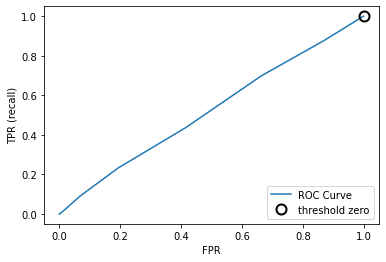

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [31]:
#使用逻辑回归模型(0.1)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,shuffle=True, random_state=0)
#正则化系数C = 1时(可调节参数C)
logreg = LogisticRegression(C = 0.001).fit(X_train, y_train)


print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.541
Test set score: 0.538


决策树模型

In [32]:
#决策树模型（0.1）
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=10,max_depth=5)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.547
Accuracy on test set: 0.534


多层感知机

In [33]:
#多层感知机
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.53
Accuracy on test set: 0.55


In [34]:
from sklearn.metrics import confusion_matrix
pred_mlp = mlp.predict(X_test)
confusion = confusion_matrix(y_test, pred_mlp)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 772 1265]
 [ 536 1457]]


In [37]:
param_grid = {'C': [0.1],
              'gamma': [0.01]}

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

In [39]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1], 'gamma': [0.01]},
             return_train_score=True)

In [40]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'gamma': 0.01}
Best cross-validation score: 0.52


不同模型

随机森林

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5, random_state=10, max_features=3)
rf.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.93
Accuracy on test set: 0.52


In [45]:
from sklearn.metrics import confusion_matrix
pred_rf = rf.predict(X_test)
confusion = confusion_matrix(y_test, pred_rf)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1213  824]
 [1115  878]]


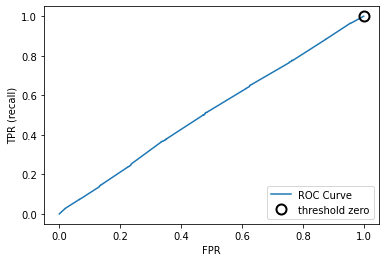

In [17]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

弹性网络

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_data, label_data, random_state=2)

In [24]:
#弹性网络模型
from sklearn.linear_model import ElasticNet
#多折交叉验证
from sklearn.model_selection import cross_validate
# import dataset split function


enet = ElasticNet(alpha=0.1, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

NameError: name 'r2_score' is not defined

# 读取基因列表

In [13]:
#读取基因列表
gene_list = pd.read_csv("E:\\Windows-SSD\\Program Files (x86)\\Common Files\\Designer\\tRF_prediction\\data\\unique_gene.csv")

gene_list = gene_list.iloc[:,1:5]

In [14]:
gene_list

,gene,utr3,utr5,cds
0,A1BG,TGCAGCCGCGGGCCCAGGGTGCTGTTGGTGTCCTCAGAAGTGCCGG...,ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGC...,ATGTCCATGCTCGTGGTCTTTCTCTTGCTGTGGGGTGTCACCTGGG...
1,A1CF,AGATGCTTTTTTAAATTTAAGAATAAGACACACAAAACTCTATTAA...,TTTGATATGACGATTAGAGCATAACCCGAGTGACACGTTGAATTCG...,ATGGAATCAAATCACAAATCCGGGGATGGATTGAGCGGCACTCAGA...
2,A2M,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCT...,ATGGGGAAGAACAAACTCCTTCATCCAAGTCTGGTTCTTCTCCTCT...
3,A2ML1,GGATAGGAGCTGGAAACTCAATTAGTCCTCTGTGACATTTACTGGA...,GACCCTGGAAAAATCTGTCTCACCCACAAAG,ATGTGGGCTCAGCTCCTTCTAGGAATGTTGGCCCTATCACCAGCCA...
4,A4GALT,GGGGCCCGCCAGGTCACCTCCCCAACCTGCTCCTGATGGGGCACTG...,AGATGGATTTGCAGCCGCTGCAAGTGTGTGGAAGGGCCGTGTTCGT...,ATGTCCAAGCCCCCCGACCTCCTGCTGCGGCTGCTCCGGGGCGCCC...
...,...,...,...,...
16601,ZYG11B,TAGCCATAAGTATTGGATAGTTGAATCACAGGAATCCTTTTTGTGA...,GGAGTCTGCGCTCTGGTTCGGGCTGCGGCTGCGGCTGCGGCTGCGG...,ATGCCCGAGGACCAGGCCGGCGCAGCCATGGAGGAGGCGTCTCCCT...
16602,ZYX,GTGAGGACAGGCCCTCTTCAGACCGCAGTCCATGCCCCATTGTGGA...,GCAGAGTCTGCGGACCCGGCGCCGAGGCGGCCACCCGAGACGCGGC...,ATGGCGGCCCCCCGCCCGTCTCCCGCGATCTCCGTTTCGGTCTCGG...
16603,ZZEF1,CCCTTGGTGGGGCGTGCATGGGACTAGTTCATCTGCCACAGGGATT...,AGGAAGCCGGAAGCCGCAGGGGCCGCCGTCGTCTCCTCCGCGTCCC...,ATGGGGAACGCTCCGAGTCACAGCAGTGAAGACGAAGCGGCAGCTG...
16604,ZZZ3,CATGGAAGAGAACATCATTTACTAGTCCTCTTCAACACATAGCAAT...,GTTGGCAGAGCAGTTGTCCTGGATGGCGGAGCCTTGGGTTCCGGGG...,ATGATAGATCTTTGGTTGTACAGTTATCAGAGACTATTACAGACGA...


In [72]:
#定义特征计算函数

def create(trf):
    seq = [trf]
    trf_seq = pd.DataFrame(seq*16606)
    trf_seq.columns = ["trf_seq"]
    return trf_seq

def AU_contant(trf_feature):
    AU_list = pd.DataFrame([0]*len(trf_feature))
    AU_list.columns = ["AU_contant"]
    for i in range(len(trf_feature)):
        upscore = 0
        downscore = 0
        for j in range(30):
            if(trf_feature.iloc[i,2][j] == "A" or trf_feature.iloc[i,2][j] == "T"):
                upscore += 1/(j+1)
            if(trf_feature.iloc[i,3][j] == "A" or trf_feature.iloc[i,3][j] == "T"):
                downscore += 1/(j+1)
        AU_list.iloc[i,0] = (upscore + downscore)/2
    trf_feature = pd.concat([trf_feature,AU_list],axis = 1)
    return trf_feature


def ispaired(nt):
    if nt == "A":
        return "T"
    if nt == "T":
        return "A"
    if nt == "G":
        return "C"
    if nt == "C":
        return "G"
    else:
        return ""

    
def bind_loc(trf_feature):
    start_loc = pd.DataFrame([0]*len(trf_feature))
    start_loc.columns = ["start_loc"]
    end_loc = pd.DataFrame([0]*len(trf_feature))
    end_loc.columns = ["end_loc"]
    for i in range(len(trf_feature)):
        seq = trf_feature.iloc[i,0][0]
        for j in range(len(trf_feature.iloc[i,2])):
            if ispaired(seq) == trf_feature.iloc[i,2][j]:
                start_loc.iloc[i,0] = j
                end_loc.iloc[i,0] = j + len(trf_feature.iloc[i,0])
                break
    trf_feature = pd.concat([trf_feature,start_loc],axis = 1)
    trf_feature = pd.concat([trf_feature,end_loc],axis = 1)
    return trf_feature

    
def bind_num(trf_feature):
    count_paired = pd.DataFrame([0]*len(trf_feature))
    count_paired.columns = ["count_paired"]
    for i in range(len(trf_feature)):
        count_num = 0
        for j in range(min(len(trf_feature.iloc[i,0]),len(trf_feature.iloc[i,2])-trf_feature.iloc[i,6])):
            if ispaired(trf_feature.iloc[i,0][j]) == trf_feature.iloc[i,2][trf_feature.iloc[i,6]+j]:
                count_num += 1
        count_paired.iloc[i,0] = count_num
    trf_feature = pd.concat([trf_feature,count_paired],axis = 1)
    return trf_feature

def maxDup(strs):
    n=len(strs)
    maxlen=1
    length=1
    maxstr=[]
    for i in range(n-1): 
        if strs[i]==strs[i+1]:
            length+=1
            maxstr.append(strs[i+1])
            if length>maxlen:
                maxlen=length
        else:
            length=1
    return maxlen


def bind_length(trf_feature):
    max_length = pd.DataFrame([0]*len(trf_feature))
    max_length.columns = ["max_length"]
    pos_longest = pd.DataFrame([0]*len(trf_feature))
    pos_longest.columns = ["pos_longest"]
    for i in range(len(trf_feature)):
        seq = ""
        for j in range(min(len(trf_feature.iloc[i,0]),len(trf_feature.iloc[i,2])-trf_feature.iloc[i,6])):
            if ispaired(trf_feature.iloc[i,0][j]) == trf_feature.iloc[i,2][trf_feature.iloc[i,6]+j]:
                seq += "T"
            else:
                seq += str(j)
        max_length.iloc[i,0] = maxDup(seq)
        pos_longest.iloc[i,0] = len(seq)
    trf_feature = pd.concat([trf_feature,max_length],axis = 1)
    trf_feature = pd.concat([trf_feature,pos_longest],axis = 1)
    return trf_feature
        

def three_prime(trf_feature):
    three_prime = pd.DataFrame([0]*len(trf_feature))
    three_prime.columns = ["three_prime"]
    for i in range(len(trf_feature)):
        count_num = 0
        for j in range(min(7,len(trf_feature.iloc[i,2])-trf_feature.iloc[i,6])):
            if ispaired(trf_feature.iloc[i,0][j]) == trf_feature.iloc[i,2][trf_feature.iloc[i,6]+j]:
                count_num += 1
        three_prime.iloc[i,0] = count_num
    trf_feature = pd.concat([trf_feature,three_prime],axis = 1)
    return trf_feature
    

In [56]:
trf_list = create("ACTGGGTCACGTAGGCCCCTGACGTAG")
trf_feature = pd.concat([trf_list,gene_list],axis = 1)
trf_feature = AU_contant(trf_feature)


In [57]:
trf_feature = bind_loc(trf_feature)

In [65]:
trf_feature = bind_num(trf_feature)

In [70]:
trf_feature = bind_length(trf_feature)

In [73]:
trf_feature = three_prime(trf_feature)

In [74]:
trf_feature

,trf_seq,gene,utr3,utr5,cds,AU_contant,start_loc,end_loc,count_paired,max_length,pos_longest,three_prime
0,ACTGGGTCACGTAGGCCCCTGACGTAG,A1BG,TGCAGCCGCGGGCCCAGGGTGCTGTTGGTGTCCTCAGAAGTGCCGG...,ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGC...,ATGTCCATGCTCGTGGTCTTTCTCTTGCTGTGGGGTGTCACCTGGG...,2.020532,0,27,11,3,38,3
1,ACTGGGTCACGTAGGCCCCTGACGTAG,A1CF,AGATGCTTTTTTAAATTTAAGAATAAGACACACAAAACTCTATTAA...,TTTGATATGACGATTAGAGCATAACCCGAGTGACACGTTGAATTCG...,ATGGAATCAAATCACAAATCCGGGGATGGATTGAGCGGCACTCAGA...,3.061407,3,30,8,3,39,2
2,ACTGGGTCACGTAGGCCCCTGACGTAG,A2M,AGACCACAAGGCTGAAAAGTGCTTTGCTGGAGTCCTGTTCTCAGAG...,GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCT...,ATGGGGAAGAACAAACTCCTTCATCCAAGTCTGGTTCTTCTCCTCT...,1.697871,12,39,8,3,39,3
3,ACTGGGTCACGTAGGCCCCTGACGTAG,A2ML1,GGATAGGAGCTGGAAACTCAATTAGTCCTCTGTGACATTTACTGGA...,GACCCTGGAAAAATCTGTCTCACCCACAAAG,ATGTGGGCTCAGCTCCTTCTAGGAATGTTGGCCCTATCACCAGCCA...,1.556215,3,30,7,2,39,1
4,ACTGGGTCACGTAGGCCCCTGACGTAG,A4GALT,GGGGCCCGCCAGGTCACCTCCCCAACCTGCTCCTGATGGGGCACTG...,AGATGGATTTGCAGCCGCTGCAAGTGTGTGGAAGGGCCGTGTTCGT...,ATGTCCAAGCCCCCCGACCTCCTGCTGCGGCTGCTCCGGGGCGCCC...,1.393580,13,40,7,3,41,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16601,ACTGGGTCACGTAGGCCCCTGACGTAG,ZYG11B,TAGCCATAAGTATTGGATAGTTGAATCACAGGAATCCTTTTTGTGA...,GGAGTCTGCGCTCTGGTTCGGGCTGCGGCTGCGGCTGCGGCTGCGG...,ATGCCCGAGGACCAGGCCGGCGCAGCCATGGAGGAGGCGTCTCCCT...,1.918910,0,27,12,3,36,3
16602,ACTGGGTCACGTAGGCCCCTGACGTAG,ZYX,GTGAGGACAGGCCCTCTTCAGACCGCAGTCCATGCCCCATTGTGGA...,GCAGAGTCTGCGGACCCGGCGCCGAGGCGGCCACCCGAGACGCGGC...,ATGGCGGCCCCCCGCCCGTCTCCCGCGATCTCCGTTTCGGTCTCGG...,1.125359,1,28,6,3,42,3
16603,ACTGGGTCACGTAGGCCCCTGACGTAG,ZZEF1,CCCTTGGTGGGGCGTGCATGGGACTAGTTCATCTGCCACAGGGATT...,AGGAAGCCGGAAGCCGCAGGGGCCGCCGTCGTCTCCTCCGCGTCCC...,ATGGGGAACGCTCCGAGTCACAGCAGTGAAGACGAAGCGGCAGCTG...,1.328136,3,30,11,6,35,1
16604,ACTGGGTCACGTAGGCCCCTGACGTAG,ZZZ3,CATGGAAGAGAACATCATTTACTAGTCCTCTTCAACACATAGCAAT...,GTTGGCAGAGCAGTTGTCCTGGATGGCGGAGCCTTGGGTTCCGGGG...,ATGATAGATCTTTGGTTGTACAGTTATCAGAGACTATTACAGACGA...,1.762528,2,29,9,4,39,3


In [67]:
#统计字符串中连续的重复字符个数
def maxDup(strs):
    n=len(strs)
    maxlen=1
    length=1
    maxstr=[]
    for i in range(n-1): 
        if strs[i]==strs[i+1]:
            length+=1
            maxstr.append(strs[i+1])
            if length>maxlen:
                maxlen=length
        else:
            length=1
    print(maxlen)
if __name__ == '__main__':
    strs='abbbc'
    maxDup(strs) #结果为3


3


In [68]:
str(3)

'3'

定义特征计算函数

In [11]:
class animal:
    def __init__(self,name,high,weight):
        self.name = name
        self.high = high
        self.weight = weight
        
    def eat(self,weight):
        all_weight = self.weight
        print("the weight is:",all_weight)
        

if __name__ == "__main__":
    animals = animal("dog",34,12)
    animals.eat(23)



the weight is: 12


In [6]:
class feature_caculation:
    def __init__(self, feature_list):
        self.feature_list = feature_list
        
    def seed(self):
        pass
        
        
    def bind_location(self):
        pass
    
    
    def max_loc(self):
        pass
        
        
        

SyntaxError: unexpected EOF while parsing (<ipython-input-6-3508f280bf5f>, line 17)

获取数据：利用pandas读取数据，进行预处理

将预处理后的数据转换成我们需要的格式

调用我们需要用到的机器学习模型



In [1]:
# 数据读取
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
